### Each of the column is a potential risk factor that could influence the chances of the person contracting CHD


<b> 1. Demographic:</b> 

<b>sex:</b> male or female;

<b>age:</b> age of the patient;

<b>2. Behavioural</b>

<b>currentSmoker:</b> whether or not the patient is a current smoker

<b>cigsPerDay:</b> the number of cigarettes that the person smoked on average in one day

<b>3. Medical (historical): </b>

<b>BPMeds:</b> whether or not the patient was on blood pressure medication

<b>prevalentStroke:</b> whether or not the patient had previously had a stroke

<b>prevalentHyp:</b> whether or not the patient was hypertensive

<b>diabetes:</b> whether or not the patient had diabetes

<b>4. Medical (current):</b>

<b>totChol:</b> total cholesterol level

<b>sysBP:</b> systolic blood pressure

<b>diaBP:</b> diastolic blood pressure

<b>BMI:</b> Body Mass Index

<b>heartRate:</b> heart rate

<b>glucose:</b> glucose level

<b>5. Target variable to predict:</b>

10-year risk of coronary heart disease CHD

In [176]:
# Importing libraries that will be required throughout the file

# To read file and create dataframe

import pandas as pd
import numpy as np

# Libraries for visualization 

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model generation

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split

#settings to ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Read CSV file into a dataframe

fhd = pd.read_csv('./framingham_heart_disease.csv')
fhd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
fhd.shape[0]

4238

In [9]:
# Getting a gist of the data

fhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
print('\n---------------------------------Below table shows the statistical data of the dataset------------------------------------')

fhd.describe()


---------------------------------Below table shows the statistical data of the dataset------------------------------------


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
# Check null values
fhd.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
# Check Duplicates

fhd.duplicated().sum()

0

In [13]:
# Fill Null values

def fillval(cols):
    for col in cols:
        fhd[col].fillna(fhd[col].mean(), inplace=True)
        if col != 'BMI':
            fhd[col] = fhd[col].round()
columns = ['education','cigsPerDay','BPMeds','totChol','BMI', 'heartRate', 'glucose']
fillval(columns)

In [14]:
fhd.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
fhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


# Univariate Analysis

#### Numerical Variables

In [16]:
def distribution_plot(data, feature, figsize=(8,5), bins=10, kde=False):
    f2, ax_hist = plt.subplots(
        nrows = 1,    #Number of rows of the subplot grid = 1
        figsize = figsize,
    )     # Creating the 2 subplots
    sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
    ax_hist.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )     # Add mean to the histogram
    ax_hist.axvline(
        data[feature].median(), color="black", linestyle="-"
    )    # Add median to the histogram

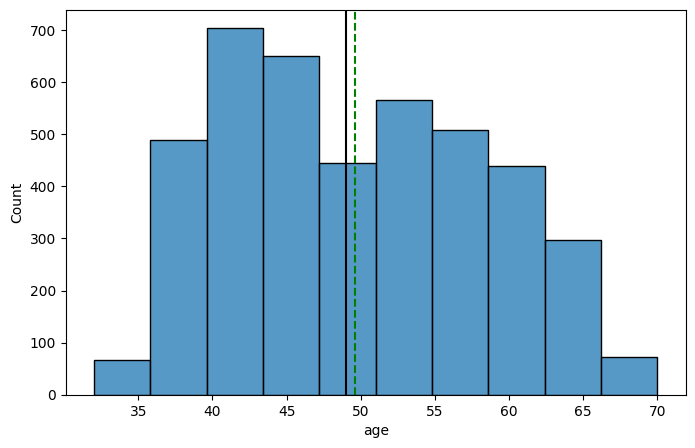

In [17]:
distribution_plot(fhd, 'age')

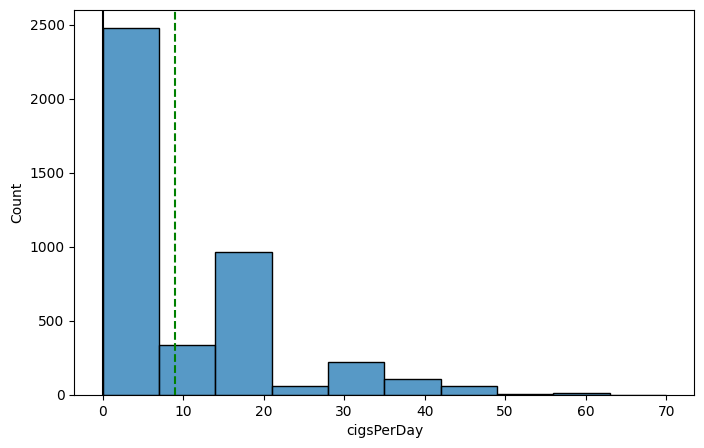

In [18]:
distribution_plot(fhd, 'cigsPerDay')

There is a large skewness in data and it can be seen that a lot of people do not smoke as the median is 0

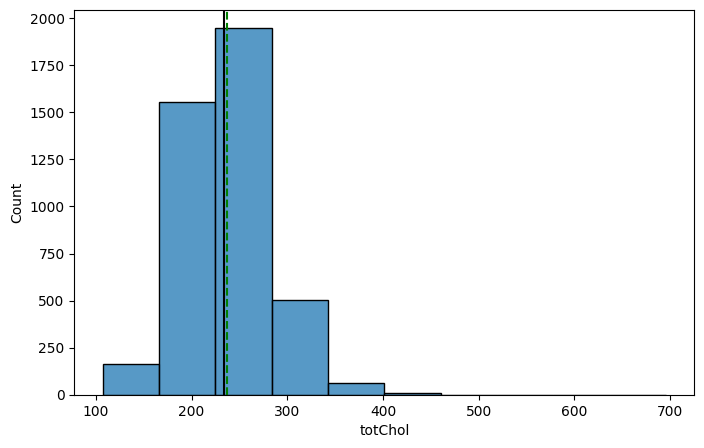

In [19]:
distribution_plot(fhd, 'totChol')

Maximum number of people have stable cholestrol which lies between 200-300

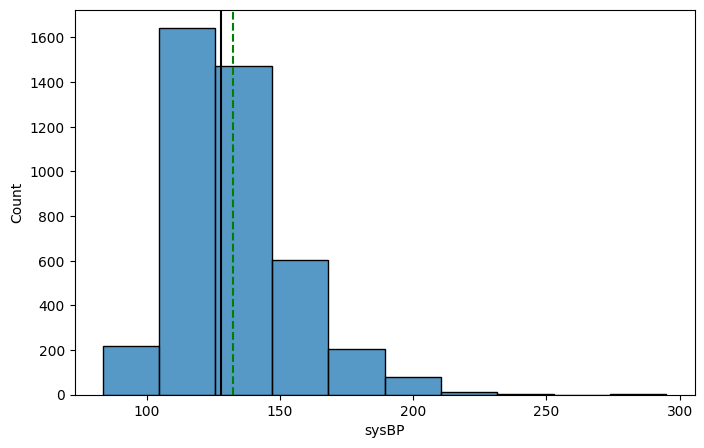

In [20]:
distribution_plot(fhd, 'sysBP')

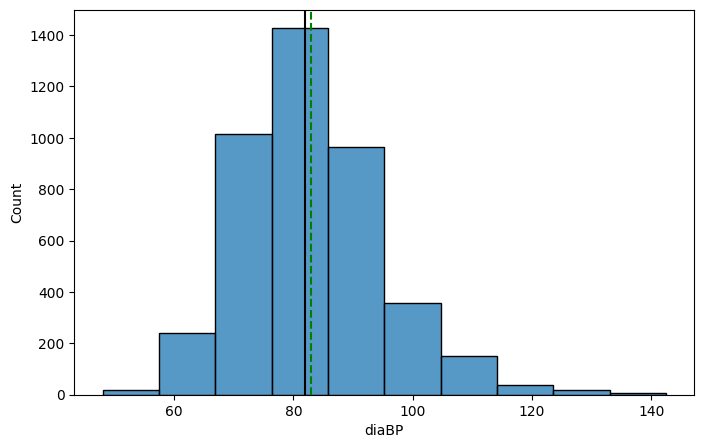

In [21]:
distribution_plot(fhd, 'diaBP')

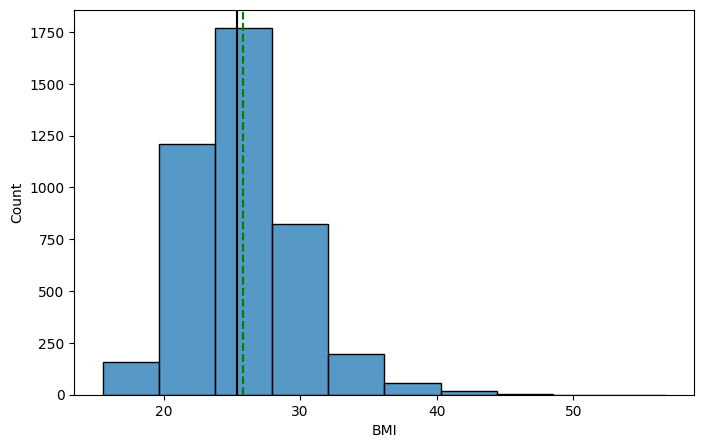

In [22]:
distribution_plot(fhd, 'BMI')

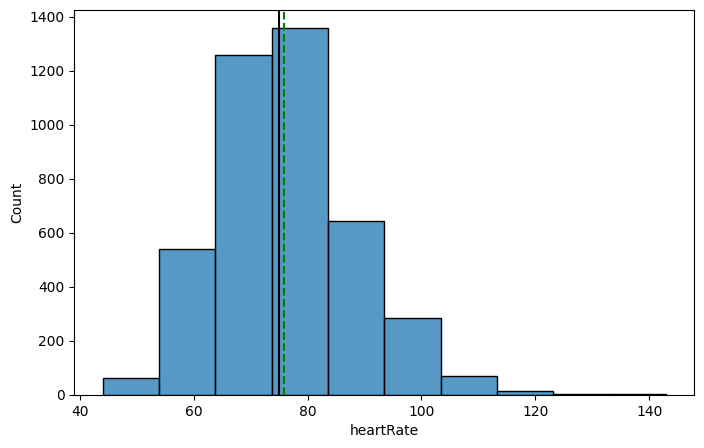

In [23]:
distribution_plot(fhd, 'heartRate')

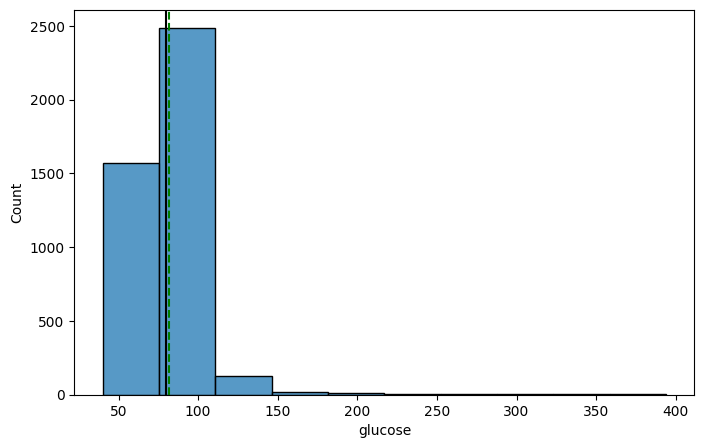

In [24]:
distribution_plot(fhd, 'glucose')

#### Categorical Variables

<AxesSubplot: xlabel='male', ylabel='count'>

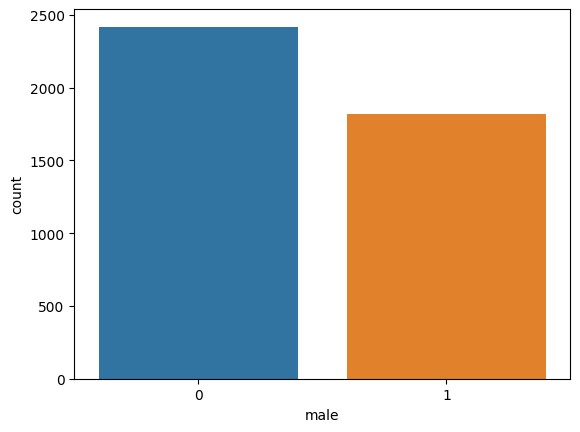

In [25]:
sns.countplot(fhd, x = fhd['male'])

In our data the count of females is more than males

<AxesSubplot: xlabel='education', ylabel='count'>

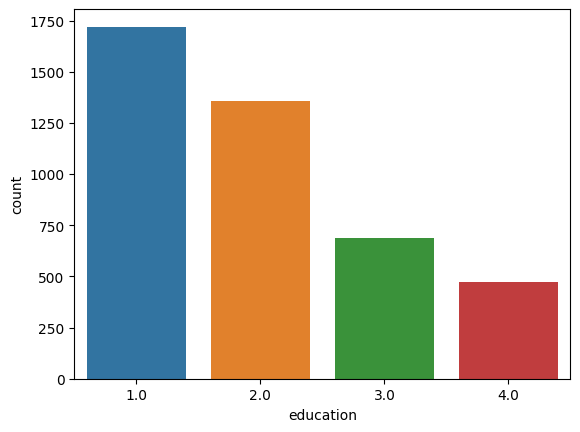

In [26]:
sns.countplot(fhd, x=fhd['education'])

In [27]:
fhd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot: xlabel='currentSmoker', ylabel='count'>

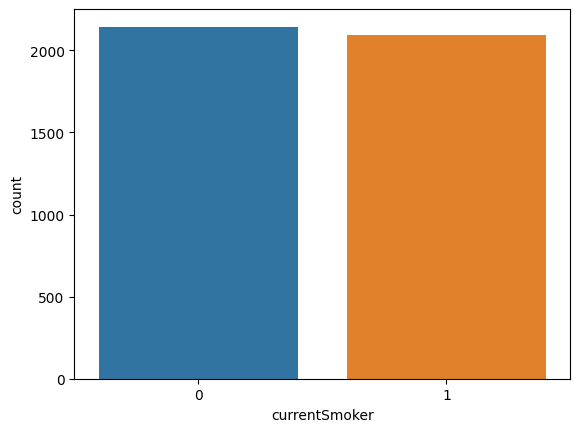

In [28]:
sns.countplot(fhd, x=fhd['currentSmoker'])

Dataset contains a fair amount of Current Smoker. The data contains similar number of Smoker and non Smoker

<AxesSubplot: xlabel='BPMeds', ylabel='count'>

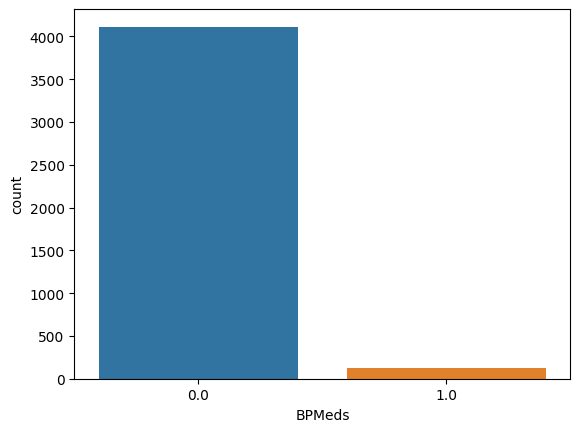

In [29]:
sns.countplot(fhd, x=fhd['BPMeds'])

In [30]:
fhd['BPMeds'].value_counts()

0.0    4114
1.0     124
Name: BPMeds, dtype: int64

<AxesSubplot: xlabel='prevalentStroke', ylabel='count'>

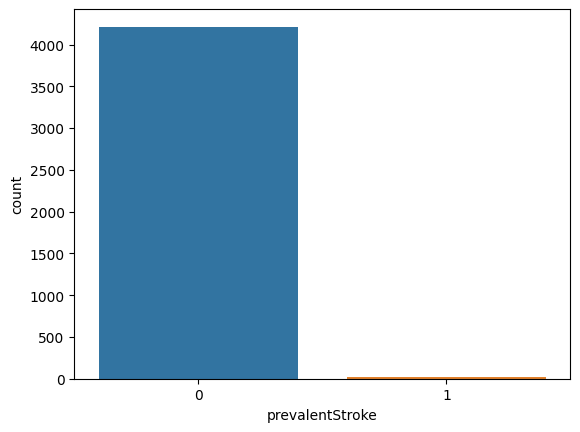

In [31]:
sns.countplot(fhd, x=fhd['prevalentStroke'])

In [32]:
fhd['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

<AxesSubplot: xlabel='prevalentHyp', ylabel='count'>

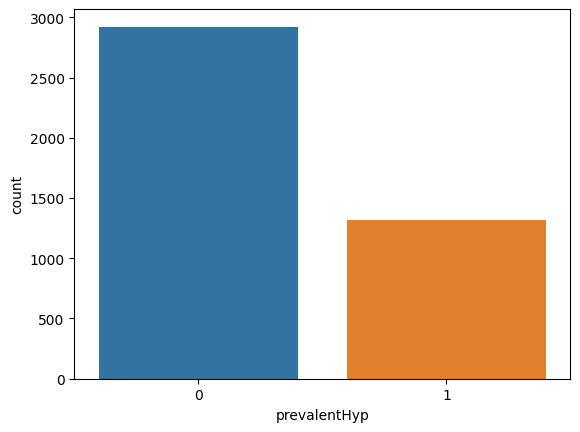

In [33]:
sns.countplot(fhd, x=fhd['prevalentHyp'])

<AxesSubplot: xlabel='diabetes', ylabel='count'>

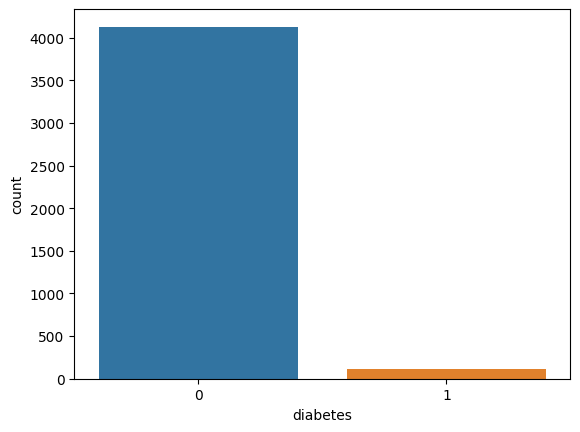

In [34]:
sns.countplot(fhd, x=fhd['diabetes'])

In [35]:
fhd['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

# Bivariate Analysis

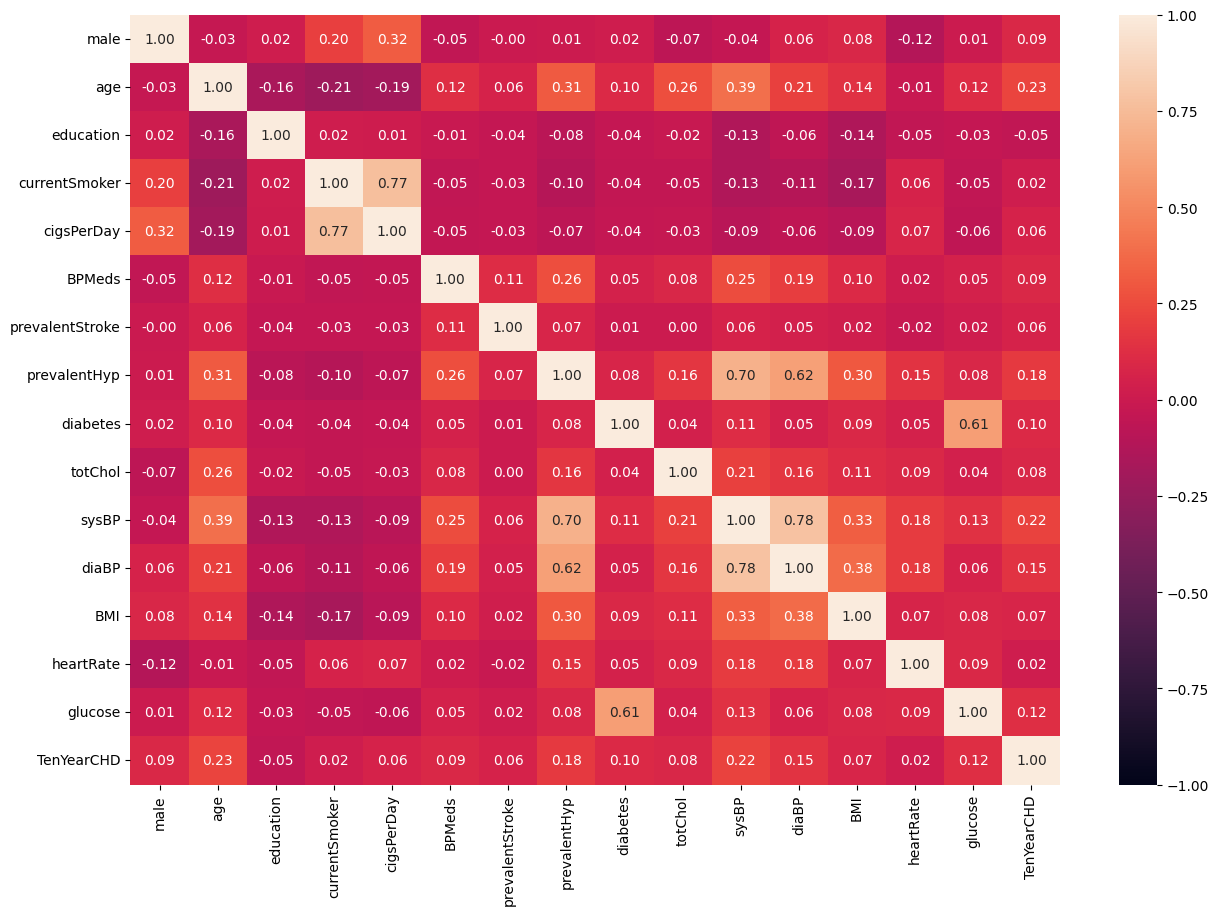

In [36]:
# Correlation Analysis

corr = fhd.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

<b>A lot of data can be extracted from this Heatmap</b>

1. There is a strong correlation between Glucose and diabetes
2. cigsPerDay and male have a mdoerate corrlation
3. sysBP and diaBP have a high correlation
4. sysBP and diaBP have a high correlation with a common feature prevalentHyp so this may produce a high multicollinearity
5. male and age and male and currentsmoker does not have a high correlation

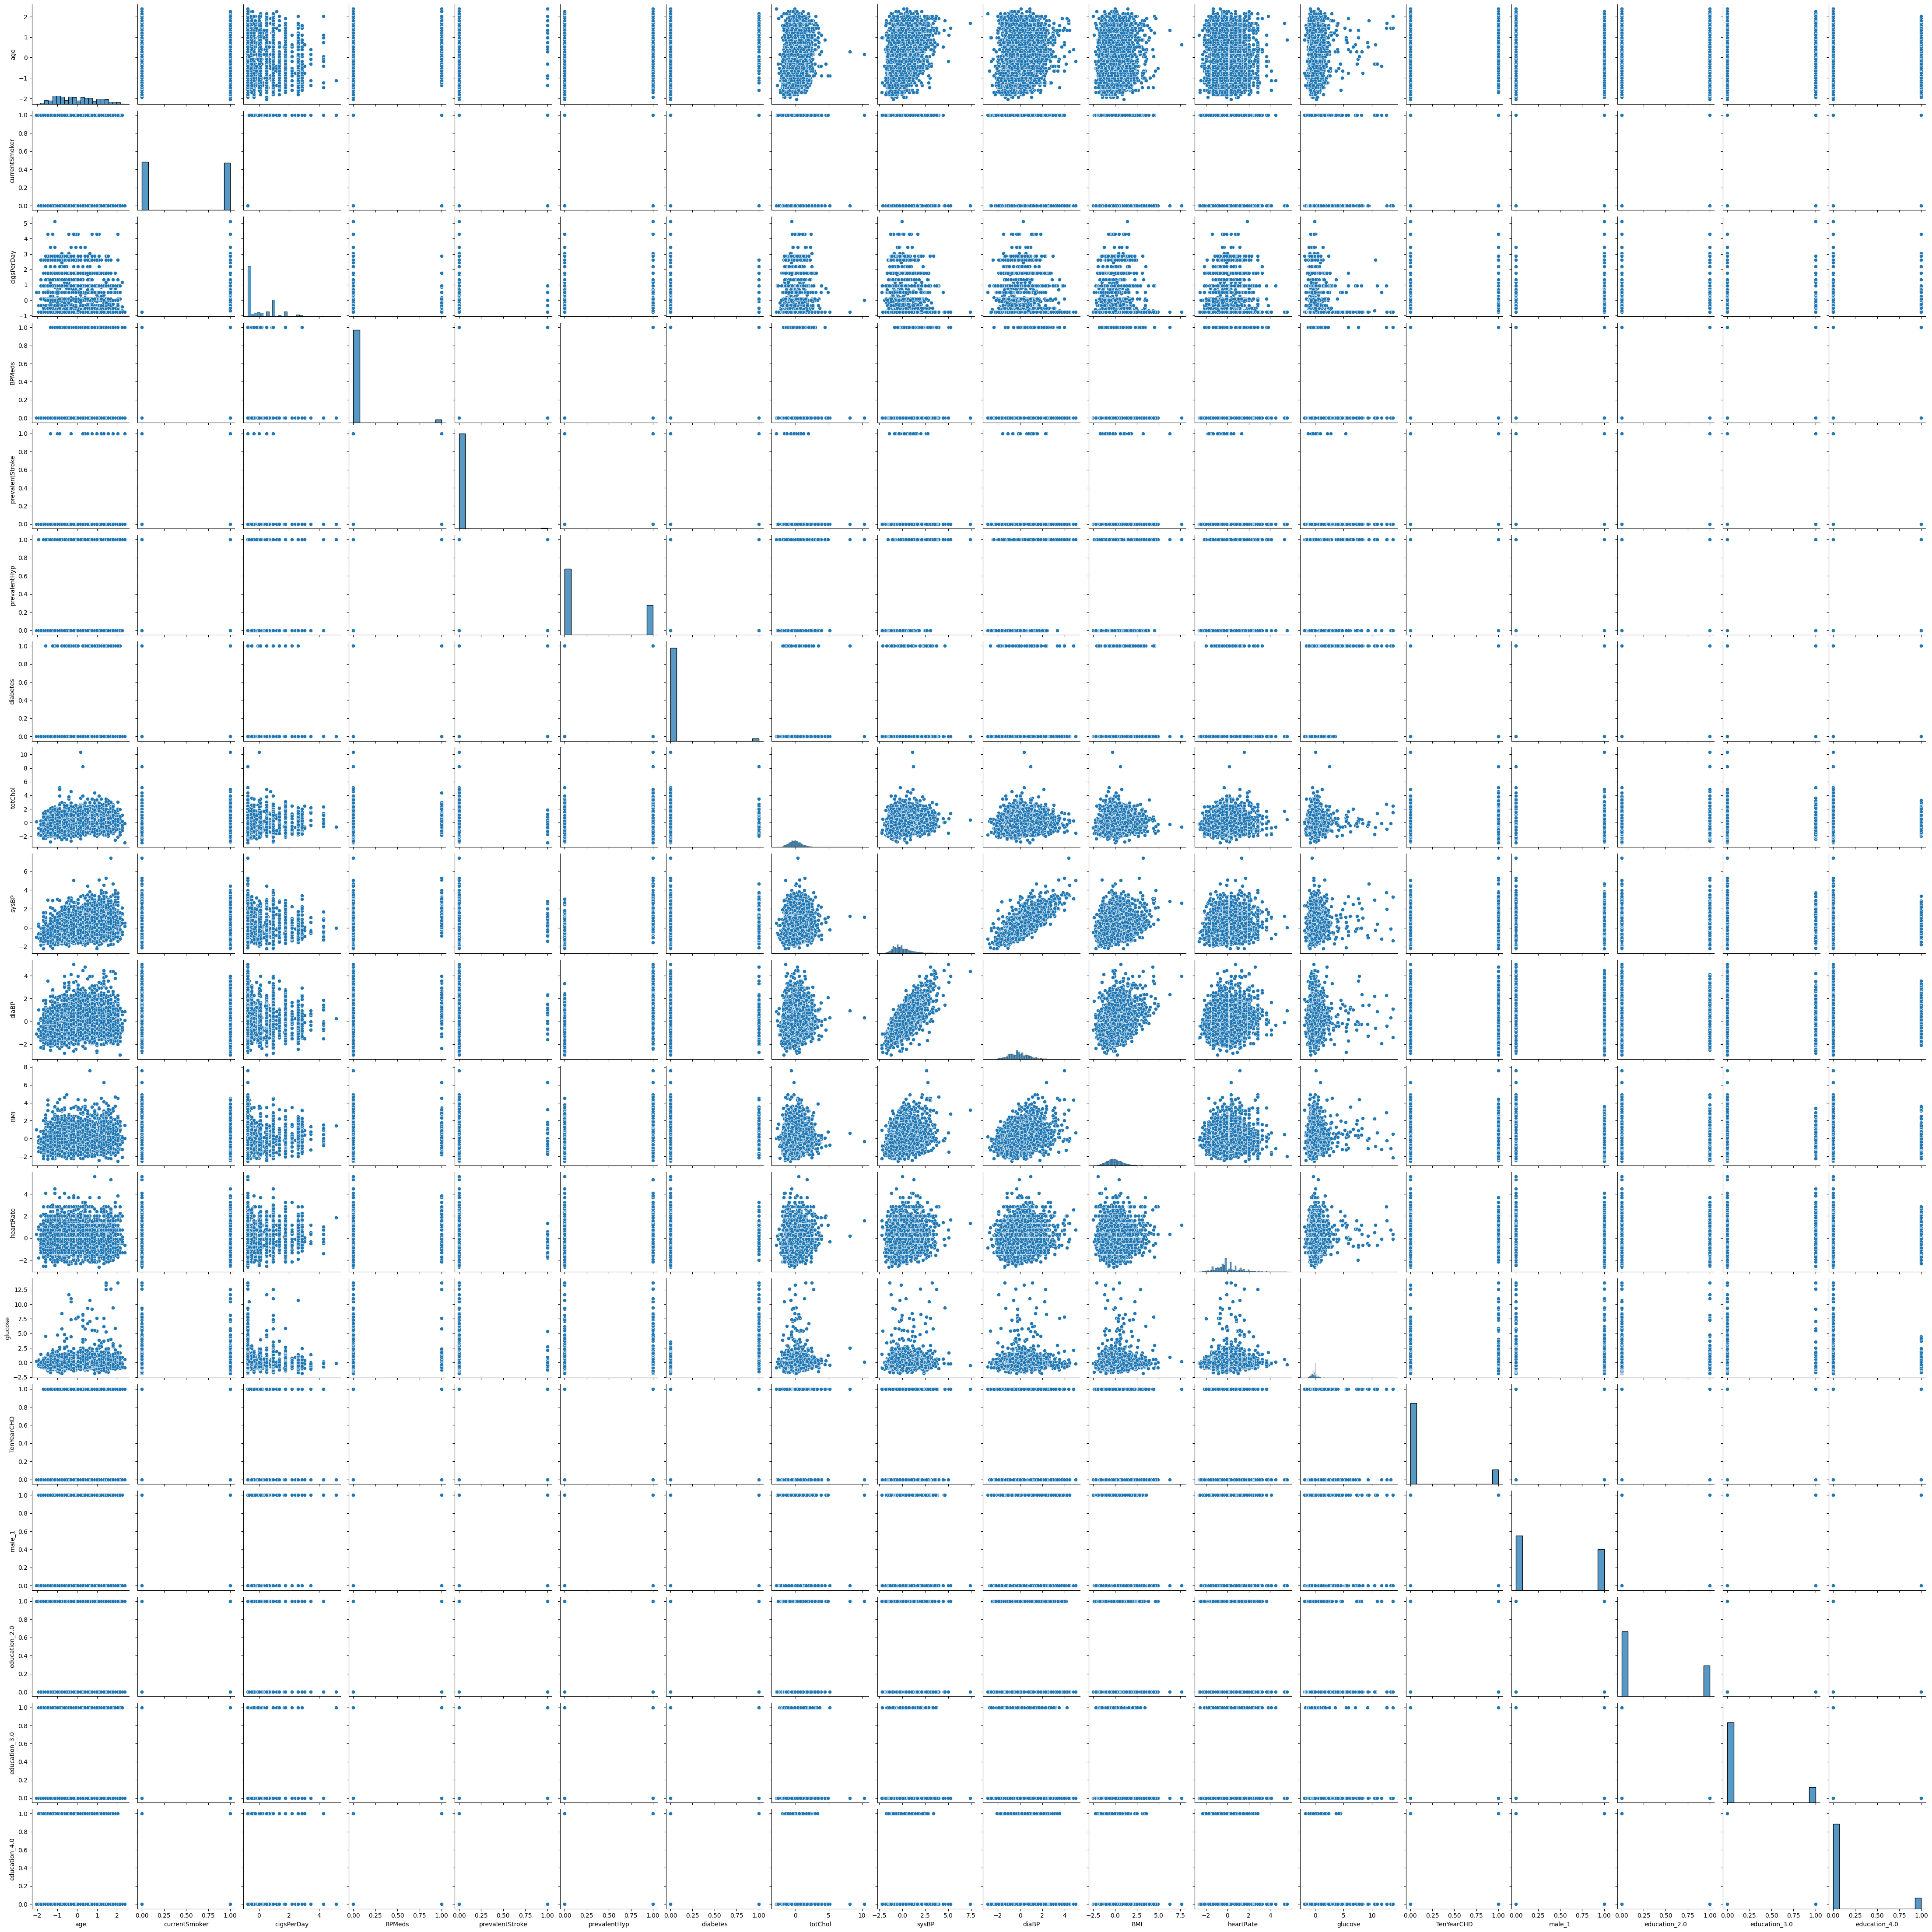

In [61]:
sns.pairplot(fhd) # Scatter plot for each and every combination of features
plt.show()

<AxesSubplot: xlabel='TenYearCHD'>

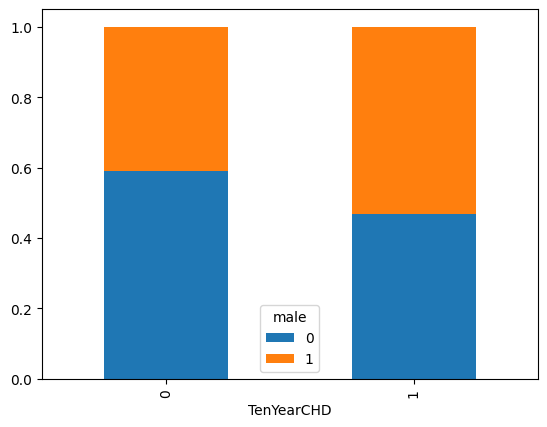

In [37]:
tchd_M = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['male'], normalize='index')
tchd_M.plot(kind='bar',stacked = True)

Observation: CHD is similarly affected in both male and female

<AxesSubplot: xlabel='TenYearCHD'>

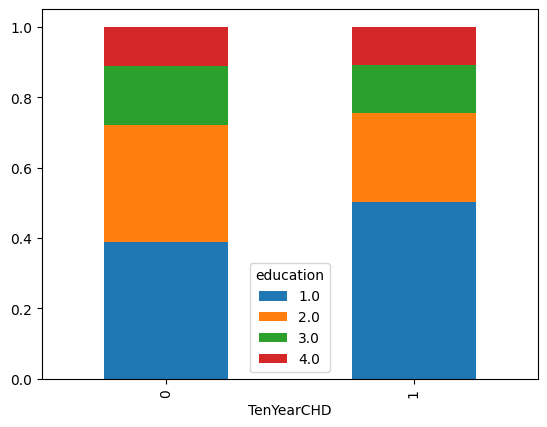

In [38]:
tchd_E = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['education'], normalize='index')
tchd_E.plot(kind='bar', stacked=True)

Ten Year CHD is mostly affecting with People having Education level 1. Since the count of people having Education Level 1 is maximum so that's a genuine thing.

<AxesSubplot: xlabel='TenYearCHD'>

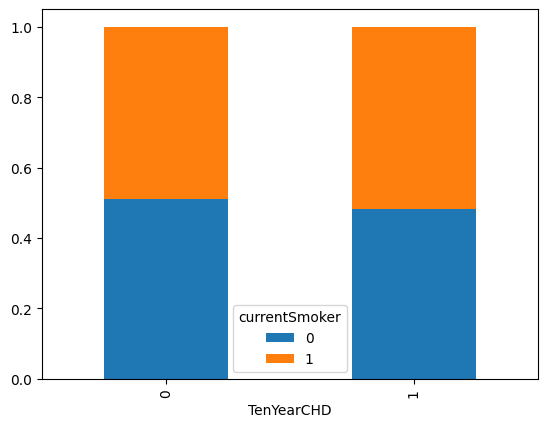

In [39]:
tchd_S = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['currentSmoker'], normalize='index')
tchd_S.plot(kind='bar', stacked=True)

There is no impact of currentSmoker on TenYearCHD as the one's affected with CHD are similar to one with CHD not affected peoples

<AxesSubplot: xlabel='TenYearCHD'>

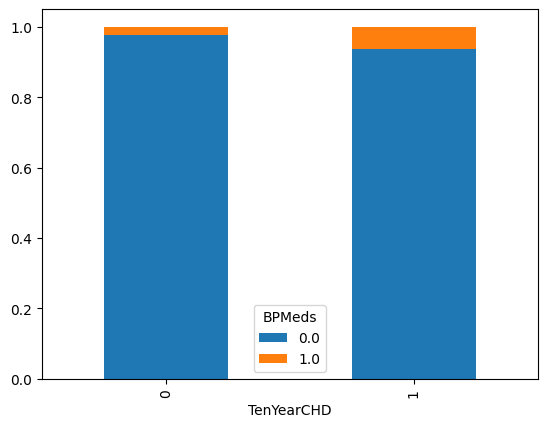

In [40]:
tchd_B = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['BPMeds'], normalize='index')
tchd_B.plot(kind='bar', stacked=True)

There is not much of impact of BP Medications on CHD. The affected one's have a really low ratio 

<AxesSubplot: xlabel='TenYearCHD'>

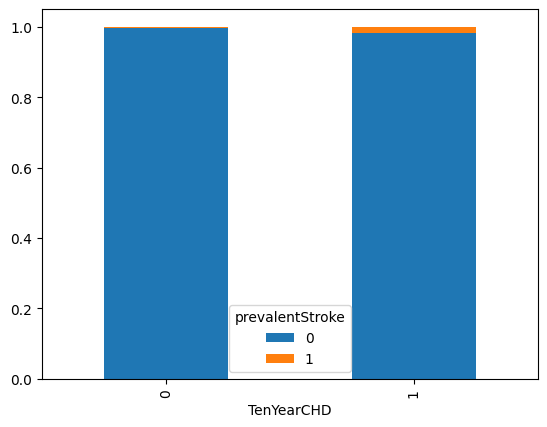

In [41]:
tchd_P = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['prevalentStroke'], normalize='index',)
tchd_P.plot(kind='bar',stacked = True)

<AxesSubplot: xlabel='TenYearCHD'>

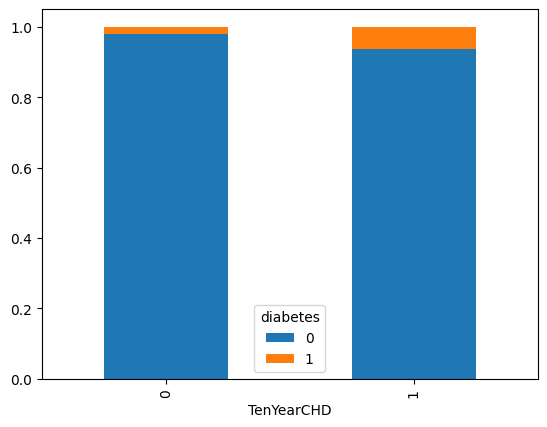

In [42]:
tchd_C = pd.crosstab(index=fhd['TenYearCHD'], columns=fhd['diabetes'], normalize='index',)
tchd_C.plot(kind='bar',stacked = True)

# Feature Engineering

In [43]:
fhd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [44]:
fhd.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,9.003067,0.029259,0.005899,0.310524,0.025720,236.724870,132.352407,82.893464,25.802008,75.878952,81.969797,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.879230,0.168552,0.076587,0.462763,0.158316,44.326463,22.038097,11.910850,4.070953,12.025177,22.836605,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [45]:
"""
def find_outliers_iqr(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(lower_bound, upper_bound)
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

column_names = ['cigsPerDay','totChol','glucose']

for column_name in column_names:
    print(f'range of cut offs: {column_name}')
    outliers = find_outliers_iqr(fhd[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))
"""

'\ndef find_outliers_iqr(data):\n    q1 = data.quantile(0.25)\n    q3 = data.quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - 1.5 * iqr\n    upper_bound = q3 + 1.5 * iqr\n    print(lower_bound, upper_bound)\n    outliers = data[(data < lower_bound) | (data > upper_bound)]\n    return outliers\n\ncolumn_names = [\'cigsPerDay\',\'totChol\',\'glucose\']\n\nfor column_name in column_names:\n    print(f\'range of cut offs: {column_name}\')\n    outliers = find_outliers_iqr(fhd[column_name])\n    print(f"The number of outliers of {column_name} are",len(outliers))\n'

In [46]:
def find_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = data[z_scores > threshold]
    return outliers

column_names = ['cigsPerDay','totChol','glucose']

for column_name in column_names:
    outliers = find_outliers_zscore(fhd[column_name])
    print(f"The number of outliers of {column_name} are",len(outliers))

The number of outliers of cigsPerDay are 21
The number of outliers of totChol are 25
The number of outliers of glucose are 50


<AxesSubplot: ylabel='glucose'>

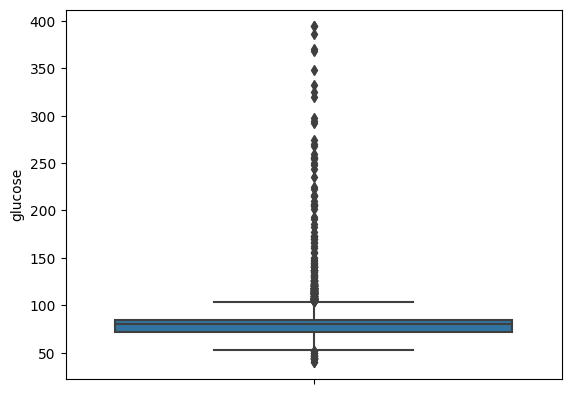

In [47]:
sns.boxplot(fhd, y=fhd['glucose'])

<AxesSubplot: ylabel='totChol'>

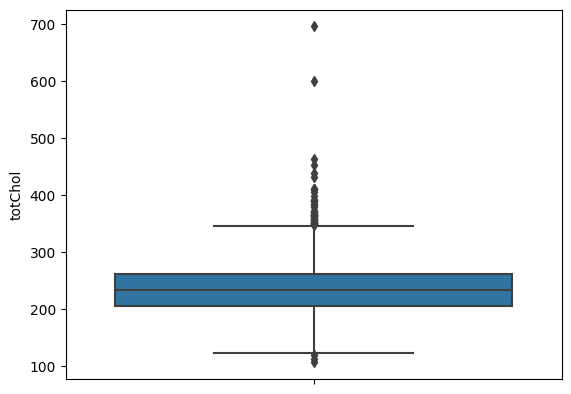

In [48]:
sns.boxplot(fhd, y=fhd['totChol'])

# Data Preprocessing

* Standardization/Normalization
* Dummy Encoding

In [49]:
# Standardisation of columns

fhd.head()
numerical_cols = ['age','cigsPerDay','totChol', 'sysBP','diaBP','BMI','heartRate','glucose']

In [50]:
scaler = StandardScaler()
fhd[numerical_cols] = scaler.fit_transform(fhd[numerical_cols])
fhd.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,4.0,0,-0.757973,0.0,0,0,0,-0.941419,-1.195907,-1.082625,0.286943,0.342742,-0.217650,0
1,0,-0.418257,2.0,0,-0.757973,0.0,0,0,0,0.299521,-0.515187,-0.158988,0.719325,1.590272,-0.261444,0
2,1,-0.184916,1.0,1,0.925837,0.0,0,0,0,0.186708,-0.220209,-0.242955,-0.113502,-0.073101,-0.524211,0
3,0,1.331800,3.0,1,1.767742,0.0,0,1,0,-0.264543,0.800871,1.016549,0.682474,-0.904788,0.921007,1
4,0,-0.418257,3.0,1,1.178408,0.0,0,0,0,1.089210,-0.106755,0.092912,-0.663807,0.758585,0.132706,0


In [51]:
# Converting categorical variables to Dummy variables through Dummy Encoding

categorical_cols = ['male','education']
fhd = pd.get_dummies(fhd, columns = categorical_cols, drop_first=True)
fhd

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,male_1,education_2.0,education_3.0,education_4.0
0,-1.234951,0,-0.757973,0.0,0,0,0,-0.941419,-1.195907,-1.082625,0.286943,0.342742,-0.217650,0,1,0,0,1
1,-0.418257,0,-0.757973,0.0,0,0,0,0.299521,-0.515187,-0.158988,0.719325,1.590272,-0.261444,0,0,1,0,0
2,-0.184916,1,0.925837,0.0,0,0,0,0.186708,-0.220209,-0.242955,-0.113502,-0.073101,-0.524211,0,1,0,0,0
3,1.331800,1,1.767742,0.0,0,1,0,-0.264543,0.800871,1.016549,0.682474,-0.904788,0.921007,1,0,0,1,0
4,-0.418257,1,1.178408,0.0,0,0,0,1.089210,-0.106755,0.092912,-0.663807,0.758585,0.132706,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,0.048425,1,-0.673782,0.0,0,1,0,1.720961,2.116930,0.764648,0.041271,-0.821619,0.176501,1,1,0,0,0
4234,0.165095,1,2.862218,0.0,0,0,0,-0.670669,-0.265590,-0.242955,-1.496634,-0.904788,-0.611800,0,1,0,1,0
4235,-0.184916,1,0.925837,0.0,0,0,0,0.254396,-0.061374,-0.914691,-0.934046,0.675417,0.176501,0,0,1,0,0
4236,-0.651598,1,0.504885,0.0,0,0,0,-0.602981,-0.265590,0.344813,-1.631754,0.841754,0.001323,0,0,0,0,0


# Train Test Split

In [52]:
X = fhd.drop('TenYearCHD', axis=1)
y = fhd['TenYearCHD']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
print(f'training data: {X_train.shape}')
print(f'test data: {X_test.shape}')
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize = True))

training data: (2966, 17)
test data: (1272, 17)
Percentage of classes in training set:
0    0.846258
1    0.153742
Name: TenYearCHD, dtype: float64
Percentage of classes in test set:
0    0.852201
1    0.147799
Name: TenYearCHD, dtype: float64


## Using Logit Model

In [55]:
#Fit the logit model and print the summary

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

logit = sm.Logit(y_train, X_train)
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                          Logit   Df Residuals:                     2948
Method:                           MLE   Df Model:                           17
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1124
Time:                        18:40:12   Log-Likelihood:                -1129.7
converged:                       True   LL-Null:                       -1272.8
Covariance Type:            nonrobust   LLR p-value:                 7.653e-51
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -2.1322      0.147    -14.493      0.000      -2.421      -1.844
age                 0.5545      0.064      8.632      0.000       0.429       0.680
currentSmoker      -0.0136      

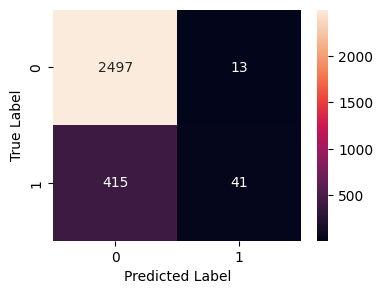

In [56]:
# Biuld a confusion Matrix and find precision & Recall for Training set

cm = confusion_matrix(y_train, round(lg.predict(X_train)))
labels = np.asarray(
    [
        ["{0:0.0f}".format(item)]
        for item in cm.flatten()
    ]
).reshape(2,2)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=labels, fmt="")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [57]:
print(f'Accuracy: {accuracy_score(y_train, round(lg.predict(X_train)))}')
print(f'Precision: {precision_score(y_train, round(lg.predict(X_train)))}')
print(f'Recall: {recall_score(y_train, round(lg.predict(X_train)))}')
print(f'f1 Score: {f1_score(y_train, round(lg.predict(X_train)))}')

Accuracy: 0.8556979096426163
Precision: 0.7592592592592593
Recall: 0.08991228070175439
f1 Score: 0.1607843137254902


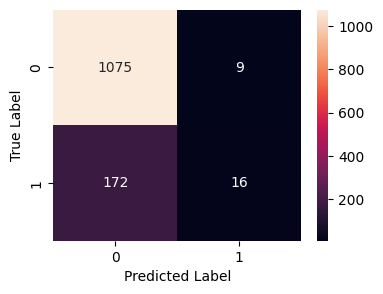

In [154]:
cm1 = confusion_matrix(y_test, round(lg.predict(X_test[selected_features])))
label1 = np.asarray(
    [
        ["{0:0.0f}".format(item)]
        for item in cm1.flatten()
    ]
).reshape(2,2)

plt.figure(figsize=(4,3))
sns.heatmap(cm1, annot=label1, fmt="")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [59]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index = X_train.columns,
    dtype=float,
)

vif_series

const              6.967019
age                1.389378
currentSmoker      2.488067
cigsPerDay         2.603080
BPMeds             1.097754
prevalentStroke    1.018268
prevalentHyp       2.028562
diabetes           1.619968
totChol            1.105193
sysBP              3.729844
diaBP              2.999289
BMI                1.251611
heartRate          1.101130
glucose            1.635850
male_1             1.222041
education_2.0      1.287488
education_3.0      1.211144
education_4.0      1.173958
dtype: float64

In [60]:
columns1 = X_train.columns.tolist()

max_p=1

while len(columns1) > 0:
    
    X_train_temp = X_train[columns1]
    
    model = sm.Logit(y_train, X_train_temp).fit(disp=False)
    
    p_vals = model.pvalues
    
    max_p = max(p_vals)
    
    feature_with_p_max = p_vals.idxmax()
    
    if max_p > 0.05:
        columns1.remove(feature_with_p_max)
    else:
        break
        
selected_features = columns1
print(selected_features)

['const', 'age', 'cigsPerDay', 'sysBP', 'glucose', 'male_1', 'education_2.0']


In [78]:
logit = sm.Logit(y_train, X_train[selected_features])
lg = logit.fit(disp=False)
y_pred = lg.predict(X_test[selected_features])
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 2966
Model:                          Logit   Df Residuals:                     2959
Method:                           MLE   Df Model:                            6
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                  0.1090
Time:                        16:47:42   Log-Likelihood:                -1134.1
converged:                       True   LL-Null:                       -1272.8
Covariance Type:            nonrobust   LLR p-value:                 5.319e-57
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.0517      0.092    -22.257      0.000      -2.232      -1.871
age               0.5599      0.061      9.128      0.000       0.440       0.680
cigsPerDay        0.2594      0.055     

In [80]:
print(classification_report(y_train, round(lg.predict(X_train[selected_features]))))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2510
           1       0.70      0.07      0.13       456

    accuracy                           0.85      2966
   macro avg       0.78      0.53      0.52      2966
weighted avg       0.83      0.85      0.80      2966



In [81]:
print(classification_report(y_test, round(y_pred)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1084
           1       0.64      0.09      0.15       188

    accuracy                           0.86      1272
   macro avg       0.75      0.54      0.54      1272
weighted avg       0.83      0.86      0.81      1272



## Observation
1. The Model is not a very good model as it is giving a Recall of only 7-8 %
2. As it is a imbalanced class classification so most of the values can be seen below the default Threshold i.e. 0.5
3. The possible way is we have to lower the threshold so that we can have a good and balanced model

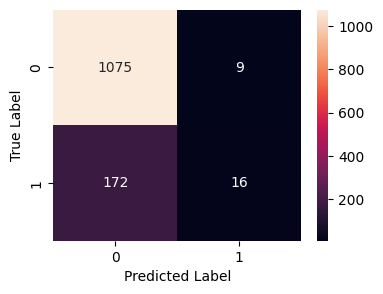

In [150]:
cm1 = confusion_matrix(y_test, round(y_pred))
label1 = np.asarray(
    [
        ["{0:0.0f}".format(item)]
        for item in cm1.flatten()
    ]
).reshape(2,2)

plt.figure(figsize=(4,3))
sns.heatmap(cm1, annot=label1, fmt="")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [142]:
y_test

3188    0
764     0
3264    0
1967    0
2185    0
       ..
610     1
570     0
343     1
2159    0
2357    0
Name: TenYearCHD, Length: 1272, dtype: int64

In [143]:
y_pred_new

3188    1.0
764     0.0
3264    0.0
1967    1.0
2185    0.0
       ... 
610     1.0
570     0.0
343     0.0
2159    0.0
2357    0.0
Length: 1272, dtype: float64

## ROC_AUC_CURVE

0.727133547931224

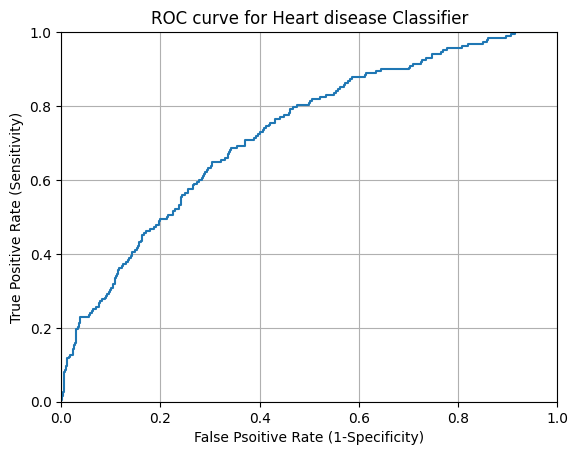

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Heart disease Classifier')
plt.xlabel('False Psoitive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#AUC (Area Under the Curve)
roc_auc_score(y_test, y_pred)

In [95]:
#Calculating Optimal Threshold
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.1594316127442819


In [144]:
y_pred_new = (y_pred>=0.15).astype(int) #fetching new values after applying threshold of 0.15

In [146]:
#classification report after the threshold of 0.15
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1084
           1       0.26      0.68      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.66      0.71      1272



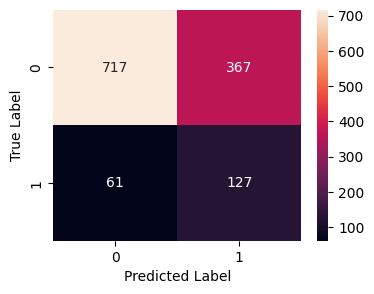

In [149]:
cm2 = confusion_matrix(y_test, y_pred_new)
label1 = np.asarray(
    [
        ["{0:0.0f}".format(item)]
        for item in cm2.flatten()
    ]
).reshape(2,2)

plt.figure(figsize=(4,3))
sns.heatmap(cm2, annot=label1, fmt="")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Conclusion
#### We can conclude that we have built an okay model that gives us 68% of recall as demanded as per our problem.

## Using Logistic Regression

In [163]:
logreg = LogisticRegression()
logreg.fit(X_train[selected_features], y_train)
y_pred_log = logreg.predict(X_test[selected_features])

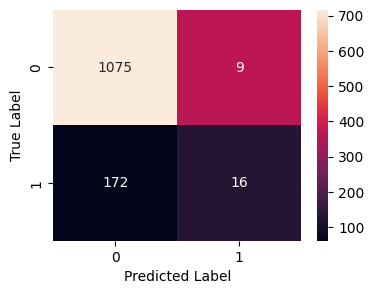

In [164]:
logg = confusion_matrix(y_test, y_pred_log)
label1 = np.asarray(
    [
        ["{0:0.0f}".format(item)]
        for item in logg.flatten()
    ]
).reshape(2,2)

plt.figure(figsize=(4,3))
sns.heatmap(cm2, annot=label1, fmt="")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [166]:
print(f'Accuracy: {accuracy_score(y_train, logreg.predict(X_train[selected_features]))}')
print(f'Precision: {precision_score(y_train, logreg.predict(X_train[selected_features]))}')
print(f'Recall: {recall_score(y_train, logreg.predict(X_train[selected_features]))}')
print(f'f1 Score: {f1_score(y_train, logreg.predict(X_train[selected_features]))}')

Accuracy: 0.8523263654753878
Precision: 0.6956521739130435
Recall: 0.07017543859649122
f1 Score: 0.12749003984063745


In [168]:
y_pred_prob = logreg.predict_proba(X_test[selected_features])[:,:]

0.7270893852555547

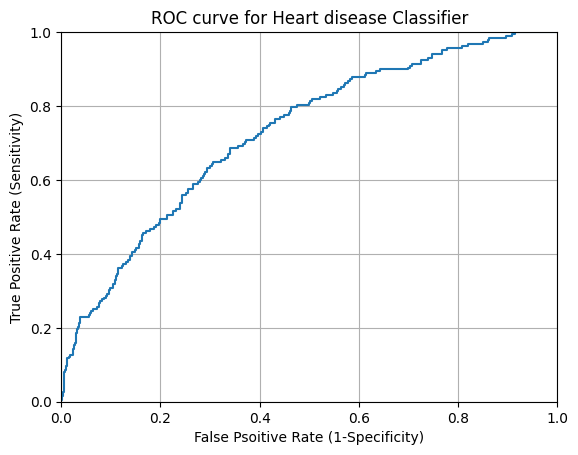

In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Heart disease Classifier')
plt.xlabel('False Psoitive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

#AUC (Area Under the Curve)
roc_auc_score(y_test, y_pred_prob[:,1])

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.14927090617631


In [172]:
logreg.predict_proba(X_test[selected_features])

array([[0.66236805, 0.33763195],
       [0.90441106, 0.09558894],
       [0.88737648, 0.11262352],
       ...,
       [0.86123523, 0.13876477],
       [0.9257914 , 0.0742086 ],
       [0.94730277, 0.05269723]])

In [175]:
pred = logreg.predict_proba(X_test[selected_features])[:,1] > optimal_threshold_auc_roc
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1084
           1       0.26      0.68      0.37       188

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.57      1272
weighted avg       0.82      0.66      0.71      1272



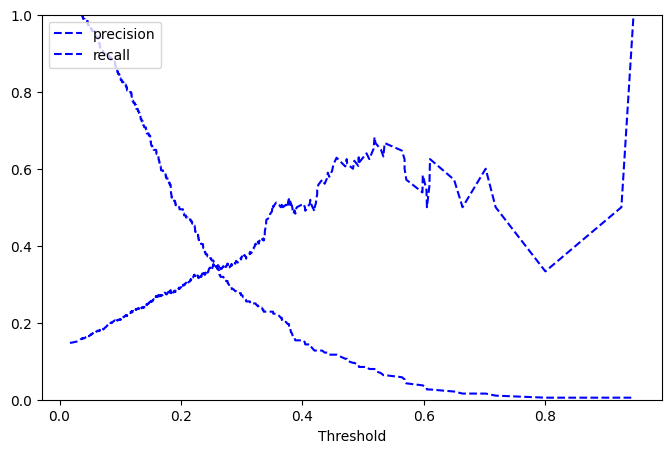

In [179]:
# Applying Precision Recall curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob[:,1])

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], "b--", label="precision")
plt.plot(thresholds, recalls[:-1], "b--", label="recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0,1])
plt.show()

In [188]:
optimal_threshold_PR = 0.22
pred = logreg.predict_proba(X_test[selected_features])[:,1] > optimal_threshold_PR
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1084
           1       0.32      0.46      0.38       188

    accuracy                           0.78      1272
   macro avg       0.61      0.64      0.62      1272
weighted avg       0.81      0.78      0.79      1272

